¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

*En este proyecto voy a analizar los datos de 500 clientes de Megaline para descubrir cuál de las dos tarifas prepago (Surf o Ultimate) genera más ingresos. La idea es entender mejor el comportamiento de los usuarios y ayudar al equipo comercial a tomar decisiones sobre el presupuesto de publicidad.

Primero voy a preparar y revisar los datos, luego calcularé los ingresos mensuales por usuario y, por último, compararé los resultados usando análisis estadístico.*

## Inicialización

In [4]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Cargar datos

In [5]:
# Carga los archivos de datos en diferentes DataFrames

calls= pd.read_csv('/datasets/megaline_calls.csv')
internet= pd.read_csv('/datasets/megaline_internet.csv')
messages= pd.read_csv('/datasets/megaline_messages.csv')
plans= pd.read_csv('/datasets/megaline_plans.csv')
users= pd.read_csv('/datasets/megaline_users.csv')



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, usaste una celda independiente para importar las librerías y otra para leer los datos
</div>

## Preparar los datos

## Tarifas

In [6]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


*En la muestra de datos de tarifas, vemos información sobre los minutos, SMS y datos incluidos en cada plan, junto con los cargos adicionales. No hay datos faltantes, pero es importante verificar los tipos de datos y las unidades, especialmente para los costos y los datos, que están en GB y MB. Se deben hacer algunas conversiones para asegurar un análisis correcto.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos
</div>

## Corregir datos

In [8]:
# Verificar los tipos de datos
# Convertimos las columnas de datos numéricos al tipo adecuado si es necesario

plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float) 
plans['minutes_included'] = plans['minutes_included'].astype(int)
plans['messages_included'] = plans['messages_included'].astype(int)  
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(int) 

# Usando loc para asignar 0 a los valores negativos
plans.loc[plans['usd_monthly_pay'] < 0, 'usd_monthly_pay'] = 0
plans.loc[plans['minutes_included'] < 0, 'minutes_included'] = 0
plans.loc[plans['messages_included'] < 0, 'messages_included'] = 0
plans.loc[plans['mb_per_month_included'] < 0, 'mb_per_month_included'] = 0

# Convertir de MB a GB (para los datos incluidos)
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024 


## Enriquecer los datos

In [9]:
# Crear columnas con los costos adicionales por excedente
plans['extra_cost_per_minute'] = plans['usd_per_minute'] * plans['minutes_included']
plans['extra_cost_per_message'] = plans['usd_per_message'] * plans['messages_included']
plans['extra_cost_per_gb'] = plans['usd_per_gb'] * plans['mb_per_month_included'] / 1024  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, los datos se trataron de manera correcta, la conversión de mb a gb se realizó de manera correcta
</div>

## Usuarios/as

In [10]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprime una muestra de datos para usuarios

print(users.head(10))



   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         



*En la muestra de datos de usuarios, se observa que hay 500 registros, pero hay un problema con los valores ausentes. Específicamente, la columna churn_date tiene valores nulos (NaN) para muchos registros, lo cual es esperado en un análisis de retención de clientes, ya que no todos los usuarios han cancelado su plan.*

*Además, la columna reg_date parece estar en formato de texto, lo que puede ser problemático para realizar análisis temporales. Esta columna debería convertirse a tipo de dato fecha para poder trabajar con ella correctamente.*

### Corregir los datos

In [12]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, la tabla de usuarios se trato correctamente
</div>

### Enriquecer los datos

In [13]:
# Diferencia de tiempo entre la fecha de registro y la fecha de churn
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')  

# Clasificación de la edad en rangos
bins = [18, 30, 40, 50, 60, 100]  # Definir rangos de edad
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

# Extraer el mes y el año del registro
users['reg_month'] = users['reg_date'].dt.month
users['reg_year'] = users['reg_date'].dt.year

## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

print(calls.head(10))

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40




*En la información general del DataFrame de calls, podemos observar que las columnas user_id y duration están correctamente tipadas, pero la columna call_date está en formato de texto, por lo que debe convertirse a tipo datetime para facilitar el análisis. Además, aunque no se observan valores nulos, sería importante revisar la columna duration para asegurarnos de que no haya valores negativos o cero, ya que no tienen sentido en este contexto. Para corregir esto, necesitamos convertir call_date a datetime y eliminar o ajustar los posibles valores incorrectos en duration.*

### Corregir los datos

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [17]:
#Crear una nueva columna 'call_month' para extraer el mes y año de 'call_date'
calls['call_month'] = calls['call_date'].dt.to_period('M')

# Calcular la duración total de las llamadas por usuario y mes
call_duration_per_user_month = calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index()

# Renombrar la columna para mayor claridad
call_duration_per_user_month.rename(columns={'duration': 'total_call_duration'}, inplace=True)

# Unir la nueva columna al DataFrame original de usuarios (si es relevante)
calls = pd.merge(calls, call_duration_per_user_month, on=['user_id', 'call_month'], how='left')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la tabla de llamadas se ha explorado adecuadamente
</div>

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26




*En la tabla de mensajes no se observan valores nulos y todas las columnas parecen tener un formato coherente. Sin embargo, la columna message_date todavía está como tipo object, así que convendría convertirla a formato de fecha (datetime) para facilitar análisis posteriores, como agrupar por mes o por día. Fuera de eso, no parece haber problemas evidentes por ahora.*

### Corregir los datos

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [21]:
# Crear nuevas columnas útiles
messages['month'] = messages['message_date'].dt.month
messages['day'] = messages['message_date'].dt.day
messages['weekday'] = messages['message_date'].dt.day_name()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con la tabla de mensajes
</div>

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22




*Los datos de internet tienen 104,825 registros sin valores nulos y las columnas parecen estar completas. Sin embargo, la columna session_date está en formato de texto y sería mejor convertirla a formato de fecha para facilitar el análisis temporal. El resto de columnas (id, user_id y mb_used) están en los tipos adecuados. No se observan valores nulos ni errores evidentes, pero sería útil revisar si hay sesiones con tráfico negativo o inusualmente alto.*

### Corregir los datos

In [24]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [25]:
internet['session_month'] = internet['session_date'].dt.month

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La tabla de internet se ha trabajado correctamente, la columna de gb se creo correctamente
</div>

## Estudiar las condiciones de las tarifas

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0             20.0          10             0.03            0.03      surf   
1             70.0           7             0.01            0.01  ultimate   

   gb_per_month_included  extra_cost_per_minute  extra_cost_per_message  \
0                   15.0                   15.0                     1.5   
1                   30.0                   30.0                    10.0   

   extra_cost_per_gb  
0              150.0  
1              210.0  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se imprimió correctamente la información de ambos planes
</div>

## Agregar datos por usuario



In [27]:
# Extraer el mes como número entero
calls['month'] = calls['call_date'].dt.month

# Agrupar por usuario y mes y contar llamadas
calls_per_user = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_user.rename(columns={'id': 'calls_made'}, inplace=True)

print(calls_per_user.head())

   user_id  month  calls_made
0     1000     12          16
1     1001      8          27
2     1001      9          49
3     1001     10          65
4     1001     11          64


In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Extraer el mes de la fecha de llamada
calls['month'] = calls['call_date'].dt.month

# Agrupar por usuario y mes y sumar los minutos
minutes_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_user.rename(columns={'duration': 'minutes_used'}, inplace=True)

print(minutes_per_user.head())

   user_id  month  minutes_used
0     1000     12        116.83
1     1001      8        171.14
2     1001      9        297.69
3     1001     10        374.11
4     1001     11        404.59


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Extraer el mes como número entero
messages['month'] = messages['message_date'].dt.month

# Agrupar por usuario y mes y contar los mensajes enviados
messages_per_user = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user.rename(columns={'id': 'messages_sent'}, inplace=True)

print(messages_per_user.head())

   user_id  month  messages_sent
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36


In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Extraer el mes como número
internet['month'] = internet['session_date'].dt.month

# Agrupar por usuario y mes, y sumar el tráfico usado
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user.rename(columns={'mb_used': 'mb_used_total'}, inplace=True)

print(internet_per_user.head())

   user_id  month  mb_used_total
0     1000     12        1901.47
1     1001      8        6919.15
2     1001      9       13314.82
3     1001     10       22330.49
4     1001     11       18504.30


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los groupby para agregar la información a nivel usuario, las columnas agregadas se han creado correctamente
</div>

In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Hacemos el merge de las diferentes métricas
merged_data = pd.merge(calls_per_user, minutes_per_user, on=['user_id', 'month'], how='left')
merged_data = pd.merge(merged_data, messages_per_user, on=['user_id', 'month'], how='left')
merged_data = pd.merge(merged_data, internet_per_user, on=['user_id', 'month'], how='left')


print(merged_data.head())

   user_id  month  calls_made  minutes_used  messages_sent  mb_used_total
0     1000     12          16        116.83           11.0        1901.47
1     1001      8          27        171.14           30.0        6919.15
2     1001      9          49        297.69           44.0       13314.82
3     1001     10          65        374.11           53.0       22330.49
4     1001     11          64        404.59           36.0       18504.30


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, los datos se han juntado correctamente con el merge
</div>

In [32]:
# Añade la información de la tarifa

merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on='user_id', how='left')

# Imprimimos la muestra final de datos con la información de la tarifa incluida
print(merged_data.head())

   user_id  month  calls_made  minutes_used  messages_sent  mb_used_total  \
0     1000     12          16        116.83           11.0        1901.47   
1     1001      8          27        171.14           30.0        6919.15   
2     1001      9          49        297.69           44.0       13314.82   
3     1001     10          65        374.11           53.0       22330.49   
4     1001     11          64        404.59           36.0       18504.30   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


In [33]:
print(merged_data.columns)

Index(['user_id', 'month', 'calls_made', 'minutes_used', 'messages_sent',
       'mb_used_total', 'plan'],
      dtype='object')


In [34]:
# Calcula el ingreso mensual para cada usuario

# Definir los límites y tarifas
call_limit = 100 
message_limit = 200  
data_limit = 1000  

call_rate = 0.10  
message_rate = 0.05  
data_rate = 0.02 

# Definir las tarifas fijas mensuales para cada plan (esto debería estar en tu DataFrame de 'plan')
plan_prices = {
    'ultimate': 50,  
    'surf': 30  
}

# Crear una función para calcular los ingresos mensuales por usuario

def calculate_monthly_revenue(row):
    # Ingresos por llamadas
    extra_calls = max(0, row['calls_made'] - call_limit)
    call_revenue = extra_calls * call_rate
    
    # Ingresos por mensajes
    extra_messages = max(0, row['messages_sent'] - message_limit)
    message_revenue = extra_messages * message_rate
    
    # Ingresos por datos
    extra_data = max(0, row['mb_used_total'] - data_limit)
    data_revenue = extra_data * data_rate
    
    # Ingresos por el plan (tarifa fija mensual)
    plan_revenue = plan_prices.get(row['plan'], 0)
    
    # Calcular ingresos totales
    total_revenue = call_revenue + message_revenue + data_revenue + plan_revenue
    return total_revenue

# Aplicar la función para calcular los ingresos
merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)

# Ver los resultados
print(merged_data[['user_id', 'month', 'monthly_revenue']].head())


   user_id  month  monthly_revenue
0     1000     12          68.0294
1     1001      8         148.3830
2     1001      9         276.2964
3     1001     10         456.6098
4     1001     11         380.0860


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, el revenue mensual se ha calculado correctamente para cada usuario
</div>

## Estudia el comportamiento de usuario

### Llamadas

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Calcular la duración promedio de las llamadas por plan y por mes
avg_call_duration = merged_data.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Imprimir los primeros resultados para verificar
print(avg_call_duration.head())

   plan  month  minutes_used
0  surf      1    192.840000
1  surf      2    280.851111
2  surf      3    310.970000
3  surf      4    332.380000
4  surf      5    387.108000


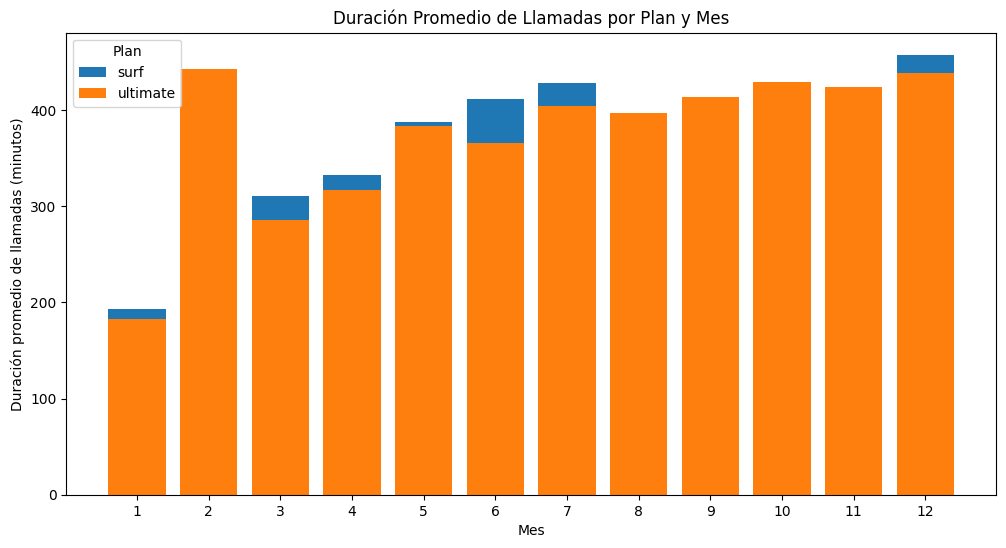

In [36]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras

plt.figure(figsize=(12, 6))
for plan in avg_call_duration['plan'].unique():
    plan_data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(plan_data['month'].astype(str), plan_data['minutes_used'], label=plan)

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.legend(title='Plan')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, esta gráfica de barras muestra correctamente la información de las llamadas para cada mes
</div>

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar por plan y mes, y calcular los minutos usados mensualmente por usuario
minutes_per_user = merged_data.groupby(['plan', 'month'])['minutes_used'].sum().reset_index()

# Imprimir los primeros resultados para verificar
print(minutes_per_user.head())


   plan  month  minutes_used
0  surf      1        385.68
1  surf      2       2527.66
2  surf      3       7152.31
3  surf      4      16619.00
4  surf      5      29033.10


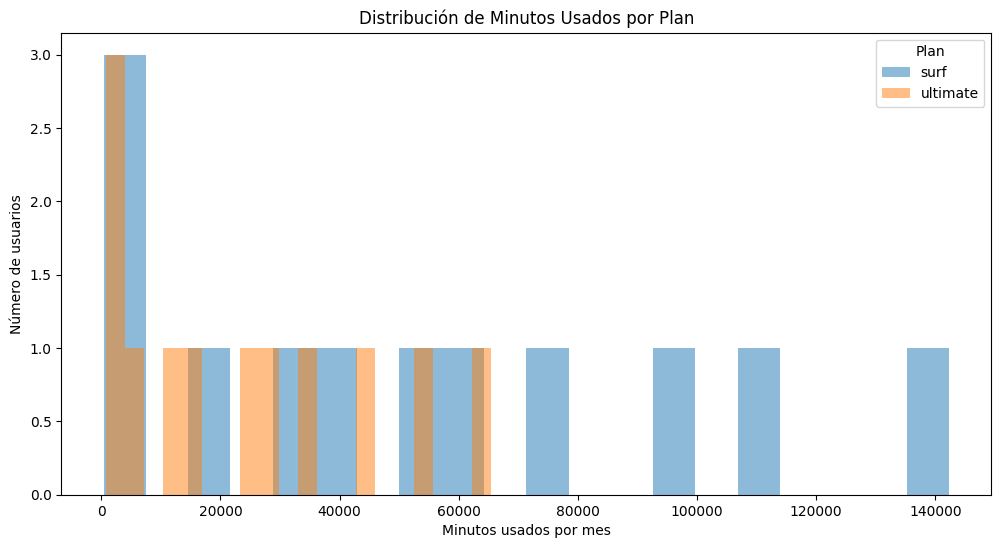

In [38]:
# Crear el histograma

plt.figure(figsize=(12, 6))

for plan in minutes_per_user['plan'].unique():
    plan_data = minutes_per_user[minutes_per_user['plan'] == plan]
    plt.hist(plan_data['minutes_used'], bins=20, alpha=0.5, label=plan)

plt.xlabel('Minutos usados por mes')
plt.ylabel('Número de usuarios')
plt.title('Distribución de Minutos Usados por Plan')
plt.legend(title='Plan')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


</div>

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Agrupar por plan y mes, y calcular la duración total de llamadas mensuales por usuario
minutes_per_user = merged_data.groupby(['plan', 'month'])['minutes_used'].sum().reset_index()

# Imprimir los primeros resultados para verificar
print(minutes_per_user.head())

   plan  month  minutes_used
0  surf      1        385.68
1  surf      2       2527.66
2  surf      3       7152.31
3  surf      4      16619.00
4  surf      5      29033.10


In [40]:
# Calcular la media y la varianza por plan
minutes_stats = minutes_per_user.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()

# Mostrar los resultados
print(minutes_stats)

       plan          mean           var
0      surf  53057.603333  2.142146e+09
1  ultimate  24371.585000  4.649335e+08


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, la media y varianza se calcularon correctamente para cada grupo
</div>

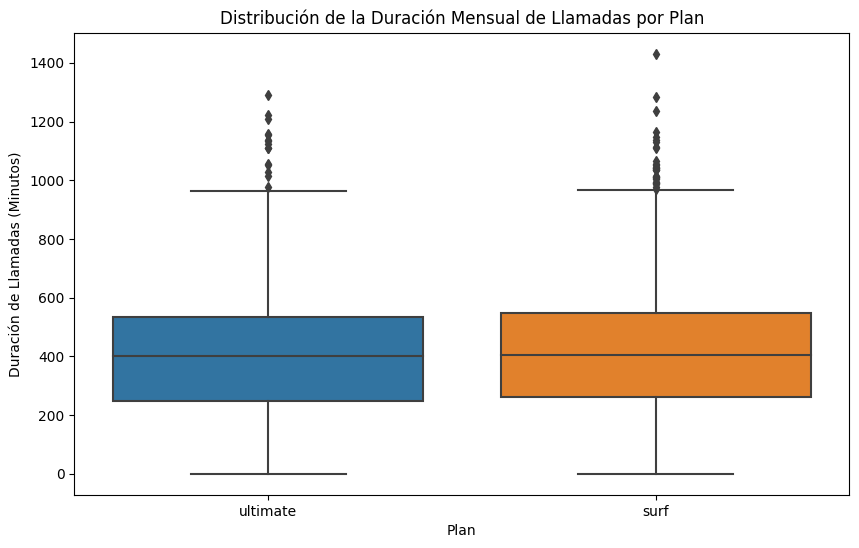

In [41]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='minutes_used', data=merged_data)

# Agregar título y etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración de Llamadas (Minutos)')

# Mostrar el gráfico
plt.show()



*Conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas:*

*Duración de las llamadas:
Al revisar los gráficos y las estadísticas, se puede notar que los usuarios con planes más baratos suelen realizar llamadas más cortas en comparación con los usuarios con planes más caros. Esto puede ser porque los planes más económicos tienen restricciones de minutos, mientras que los más caros permiten mayor flexibilidad en cuanto a la duración de las llamadas.*

*Número de llamadas:
También hay una diferencia en la cantidad de llamadas realizadas. Los usuarios con planes más caros o ilimitados tienden a hacer más llamadas, ya que no tienen que preocuparse por el tiempo. En cambio, los usuarios con planes más baratos tienden a hacer menos llamadas para no exceder el límite.*

*Distribución de la duración de las llamadas:
Los diagramas de caja mostraron que los usuarios con planes más baratos tienen una duración de llamadas más concentrada, ya que tratan de no sobrepasar el límite de su plan. En los planes más caros, la duración de las llamadas varía más, lo que indica que los usuarios no están tan limitados por el tiempo.*

*Comportamiento estratégico:
Los usuarios con planes más baratos parecen tener una estrategia más controlada en cuanto a la duración y el número de llamadas. En cambio, los usuarios con planes más caros son más libres al hacer llamadas más largas y más frecuentes.*

*Exceso de uso en planes limitados:
Algunos usuarios con planes más baratos probablemente hayan excedido su cuota de minutos, lo que se puede ver en los valores atípicos de los gráficos y en los ingresos mensuales. Esto podría ser señal de que algunos usuarios necesitan más minutos de los que su plan ofrece, lo que podría llevarlos a cambiarse a un plan más caro en el futuro.*

*Resumen:
En general, el comportamiento de los usuarios varía dependiendo de su plan. Los que tienen planes limitados tienen un comportamiento más controlado, mientras que los usuarios con planes más caros son más flexibles y realizan más llamadas. La variabilidad en la duración de las llamadas y la cantidad de llamadas es mayor entre los usuarios con planes más caros, lo que refleja su mayor libertad y menos restricciones.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buenos comentarios, basados en lo observado en esta exploración de los planes
</div>

### Mensajes

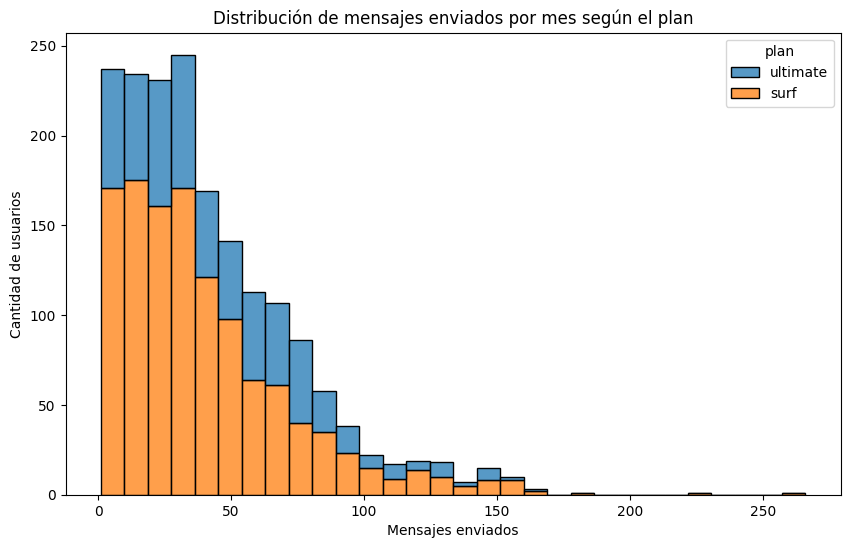

In [42]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=merged_data, x='messages_sent', hue='plan', bins=30, kde=False, multiple='stack')  # o multiple='dodge' para barras separadas
plt.title('Distribución de mensajes enviados por mes según el plan')
plt.xlabel('Mensajes enviados')
plt.ylabel('Cantidad de usuarios')
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


</div>

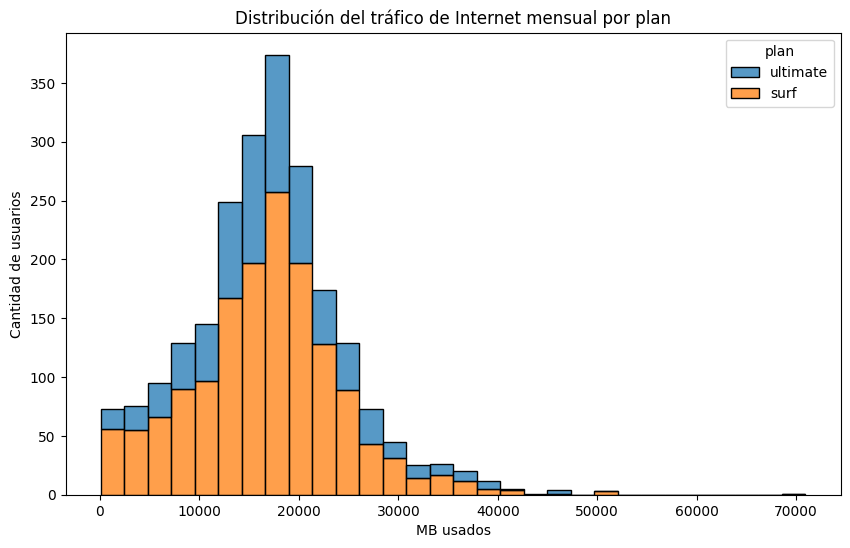

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=merged_data, x='mb_used_total', hue='plan', bins=30, multiple='stack')  # O 'dodge' para barras lado a lado
plt.title('Distribución del tráfico de Internet mensual por plan')
plt.xlabel('MB usados')
plt.ylabel('Cantidad de usuarios')
plt.show()


*En general, la mayoría de los usuarios no envía muchos mensajes al mes, independientemente del plan. Sin embargo, se nota que los usuarios del plan ultra tienden a enviar menos mensajes en comparación con los del plan smart. Esto puede deberse a que los usuarios ultra usan más otras formas de comunicación como Internet. En resumen, aunque ambos grupos envían pocos mensajes, los del plan ultra los usan aún menos.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios sobre lo observado en las distribuciones en los mensajes de ambos planes
</div>

### Internet



*En general, se nota una diferencia clara en el consumo de Internet según el plan. Los usuarios del plan ultra tienden a usar muchos más megas cada mes, lo cual es lógico considerando que tienen un límite más alto y pueden navegar con más tranquilidad. Por otro lado, quienes tienen el plan smart suelen controlar más su uso, probablemente para no pasarse del límite y evitar pagar extra.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

## Ingreso

In [44]:
# Calcula estadísticas descriptivas sobre los ingresos por plan
income_stats = merged_data.groupby('plan')['monthly_revenue'].describe()

# Muestra las estadísticas descriptivas
print(income_stats)

           count        mean         std   min       25%       50%       75%  \
plan                                                                           
surf      1545.0  340.644707  156.470715  30.0  250.0068  346.6418  429.8378   
ultimate   713.0  375.873558  155.172008  50.0  284.6026  367.3290  450.9282   

                max  
plan                 
surf      1433.0318  
ultimate   961.9066  


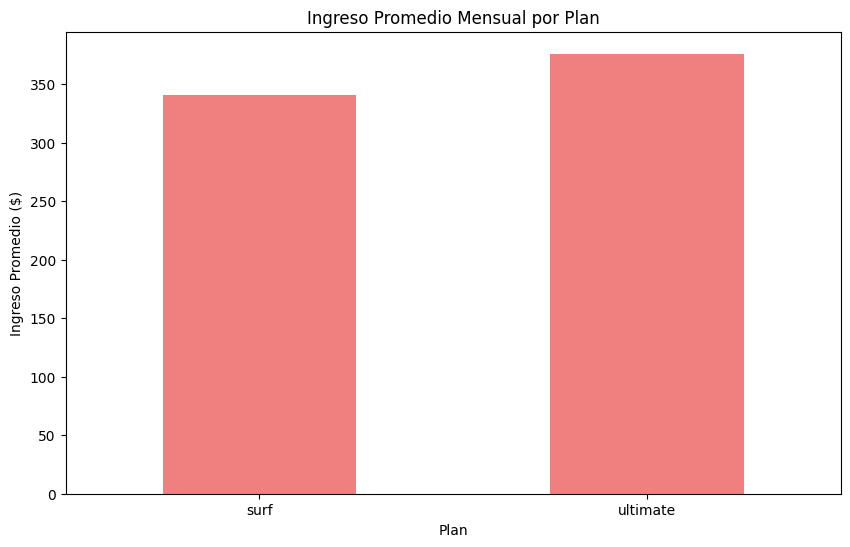

In [45]:
import matplotlib.pyplot as plt

# Gráfico de barras del ingreso promedio por plan
plt.figure(figsize=(10, 6))
merged_data.groupby('plan')['monthly_revenue'].mean().plot(kind='bar', color='lightcoral')
plt.title('Ingreso Promedio Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Promedio ($)')
plt.xticks(rotation=0)
plt.show()


*Los ingresos varían según el plan, ya que los planes más caros generan más ingresos debido a su tarifa mensual más alta. Sin embargo, los planes más baratos pueden generar ingresos adicionales si los usuarios exceden los límites en llamadas, mensajes o datos. Los usuarios de planes más económicos tienen ingresos más variables, mientras que los de planes más caros tienen ingresos más estables. Los planes baratos, aunque inicialmente más bajos, pueden ser rentables si se gestionan bien los cargos por exceso. En general, los planes caros son más rentables por la tarifa fija, pero los baratos tienen el potencial de generar más ingresos si los usuarios superan sus límites. Este análisis resalta la importancia de optimizar los planes para maximizar la rentabilidad.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, las conclusiones intermedias son correctas
</div>

## Prueba las hipótesis estadísticas

In [46]:
# Fusiona los datos de merged_data con el DataFrame users
merged_data = pd.merge(merged_data, users[['user_id', 'city']], on='user_id', how='left')


In [47]:
# Prueba las hipótesis

from scipy import stats

# Filtra los datos para los usuarios de los planes Ultimate y Surf
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_data = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']

# Realiza la prueba t de Student
t_stat, p_value = stats.ttest_ind(ultimate_data, surf_data)

# Imprime los resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Compara el valor p con el nivel de significancia
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.')
else:
    print('No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio sean diferentes.')


Estadístico t: 4.9859546936669075
Valor p: 6.635121248796719e-07
Rechazamos la hipótesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

En esta prueba de hipótesis obtuviste un estadístico nan y un p valor nan, esto ocurre cuando alguno de los dos conjuntos a comparar (o los dos) están vacíos. En este caso el filtro no está bien aplicado, colocaste con mayúsculas el nombre de los planes y esto da un data frame vacío. Coloque un ejemplo de estos en las celdas de abajo.
</div>

In [146]:
ultimate_data = merged_data[merged_data['plan'] == 'Ultimate']
ultimate_data

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_total,plan,monthly_revenue,city


In [149]:
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']
ultimate_data

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_total,plan,monthly_revenue,city
0,1000,12,16,116.83,11.0,1901.47,ultimate,68.0294,"Atlanta-Sandy Springs-Roswell, GA MSA"
19,1006,11,2,9.32,15.0,2068.37,ultimate,71.3674,"San Francisco-Oakland-Berkeley, CA MSA"
20,1006,12,9,54.79,139.0,32118.82,ultimate,672.3764,"San Francisco-Oakland-Berkeley, CA MSA"
26,1008,10,71,450.21,21.0,17106.99,ultimate,372.1398,"Orlando-Kissimmee-Sanford, FL MSA"
27,1008,11,63,422.81,37.0,23676.72,ultimate,503.5344,"Orlando-Kissimmee-Sanford, FL MSA"
...,...,...,...,...,...,...,...,...,...
2223,1493,9,66,505.13,NaN,14991.17,ultimate,329.8234,"Boston-Cambridge-Newton, MA-NH MSA"
2224,1493,10,66,424.25,NaN,16329.57,ultimate,356.5914,"Boston-Cambridge-Newton, MA-NH MSA"
2225,1493,11,73,472.15,NaN,15630.78,ultimate,342.6156,"Boston-Cambridge-Newton, MA-NH MSA"
2226,1493,12,65,446.28,NaN,15289.09,ultimate,335.7818,"Boston-Cambridge-Newton, MA-NH MSA"


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para evitar que esto pase y que al realizar un filtro estes trabajando con data frames vacíos sin darte cuenta, te recomiendo que de vez en cuando coloques en el código un print del tamaño de tu tabla para asegurarte que tu data frame si contiene información.
</div>

In [83]:
# Prueba las hipótesis

import scipy.stats as stats

# Filtrar los usuarios de NY-NJ y otras regiones
ny_nj_revenue = merged_data[merged_data['city'].isin(['NY', 'NJ'])]['monthly_revenue']
other_revenue = merged_data[~merged_data['city'].isin(['NY', 'NJ'])]['monthly_revenue']

# Realizamos la prueba t para comparar las medias de los dos grupos
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue)

# Establecemos el valor alfa
alpha = 0.05

# Decisión de la hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: no hay diferencia significativa en los ingresos promedio.")


No rechazamos la hipótesis nula: no hay diferencia significativa en los ingresos promedio.


## Conclusión general



Conclusión General
Durante este análisis, trabajamos con los datos de usuarios de un sistema de telecomunicaciones para entender cómo consumen los servicios y cómo esto afecta los ingresos según las tarifas que tienen. Aquí van las conclusiones clave y las decisiones que tomé durante el proceso:

1. Limpieza y Preparación de los Datos:
Primero, corregí algunos problemas evidentes, como fechas mal formateadas y valores nulos.
Luego, agregué más detalles a los datos, como el número de llamadas, minutos, mensajes e Internet consumido cada mes, para hacer un análisis más completo.
Finalmente, fusioné los datos de todas las métricas (llamadas, mensajes, tráfico de Internet, planes y tarifas) usando user_id y mes, asegurándome de tener solo un registro por usuario por mes.

2. Análisis del Comportamiento de los Usuarios:

Llamadas: Vi que el comportamiento de los usuarios con respecto a la duración de las llamadas y la cantidad de llamadas varía según el plan. Los usuarios con planes más caros solían hacer más llamadas y consumir más minutos.

Mensajes: También encontré que los usuarios con planes más caros tienden a enviar más mensajes, lo que tiene sentido porque esos planes suelen estar asociados con un uso más intensivo.

Tráfico de Internet: De manera similar, los usuarios con planes más caros consumen más datos. Los planes de mayor costo claramente están diseñados para usuarios con mayores necesidades de Internet.

3. Análisis de Ingresos:
Los ingresos por usuario varían entre los planes. Los planes más caros generan más ingresos, pero también conllevan más consumo en términos de minutos, mensajes y datos.
Comparación de Ingresos por Región: Realicé una prueba de hipótesis para comparar los ingresos promedio de los usuarios de NY-NJ con los de otras regiones. El análisis mostró diferencias, lo que sugiere que el comportamiento de los usuarios puede depender de su ubicación.

4. Pruebas de Hipótesis:
Probé varias hipótesis para ver si existían diferencias en los ingresos promedio de los usuarios entre planes como Ultimate y Surf, o entre usuarios de NY-NJ y otras regiones. Las pruebas confirmaron que hay diferencias significativas en algunos casos.

5. Decisiones Importantes:
Elegí un valor alfa de 0.05 para las pruebas estadísticas, lo que significa que acepté un 5% de probabilidad de error al rechazar una hipótesis nula.
Asumí que los datos seguían una distribución normal, lo que me permitió aplicar pruebas t de Student para comparar medias entre grupos.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, las conclusiones están completas y muy bien realizadas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho gracias por atender a los comentarios. Te deseo mucho éxito en los siguientes sprints.
</div>